# Part 1: Importing libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import string
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import warnings
warnings.filterwarnings("ignore")

# Part 2: Loading the Dataset:

In [2]:
netflix=pd.read_csv("C:\\Users\\227475\\OneDrive\\Desktop\\Netflix Project\\netflixdata.csv")

# Part 3: Exploratory Data Analysis:

In [3]:
netflix

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                                  genre  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

In [4]:
netflix.head(3)

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water              NaN   
2      s3  TV Show             Ganglands  Julien Leclercq   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   

                                               genre  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...

In [5]:
netflix.tail(3)

show_id   type       title         director  \
8804   s8805  Movie  Zombieland  Ruben Fleischer   
8805   s8806  Movie        Zoom     Peter Hewitt   
8806   s8807  Movie      Zubaan      Mozez Singh   

                                                   cast        country  \
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

            date_added  release_year rating duration  \
8804  November 1, 2019          2009      R   88 min   
8805  January 11, 2020          2006     PG   88 min   
8806     March 2, 2019          2015  TV-14  111 min   

                                               genre  \
8804                         Comedies, Horror Movies   
8805              Children & Family Movies, Comedies   
8806  Dramas, International Movies, Music & Musicals   

                                            description  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...

In [6]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  genre         8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
print("Number of rows: ",netflix.shape[0])
print("Number of columns: ",netflix.shape[1])

Number of rows:  8807
Number of columns:  12


In [8]:
print("The 12 columns of our dataset are: \n")
for i in range(len(list(netflix.columns))):
    print(list(netflix.columns)[i])

The 12 columns of our dataset are: 

show_id
type
title
director
cast
country
date_added
release_year
rating
duration
genre
description


In [9]:
#Number of unique values present for each column

netflix.nunique()

show_id         8807
type               2
title           8804
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
genre            514
description     8775
dtype: int64

In [10]:
# The different values possible for "type" column

list(netflix['type'].unique())

['Movie', 'TV Show']

In [11]:
# The different types of ratings available

list(netflix['rating'].unique())

['PG-13',
 'TV-MA',
 'PG',
 'TV-14',
 'TV-PG',
 'TV-Y',
 'TV-Y7',
 'R',
 'TV-G',
 'G',
 'NC-17',
 '74 min',
 '84 min',
 '66 min',
 'NR',
 nan,
 'TV-Y7-FV',
 'UR']

#### We see that the values '74 min', '84 min' and '66 min', seem to have been added faultily into the rating column instead of duration. We will fix this during data cleaning.

In [12]:
# The different types of genres present

# Here we observe that the genre column has a lot of different combinations of genres presnt in a single cell, so we make a 
# neater list to display all the unique values of genres possible. 

uniquegenre =  list(pd.unique(netflix.genre.str.split(",", expand =  True).stack()))
for i  in range(len(uniquegenre)):
    uniquegenre[i] = uniquegenre[i].strip()

uniquegenre=[*set(uniquegenre)]
uniquegenre

['Comedies',
 'Sci-Fi & Fantasy',
 'Stand-Up Comedy',
 'Documentaries',
 'Romantic Movies',
 'TV Sci-Fi & Fantasy',
 'LGBTQ Movies',
 'TV Mysteries',
 'Anime Features',
 'TV Thrillers',
 'Dramas',
 'Children & Family Movies',
 'International Movies',
 'Independent Movies',
 'Romantic TV Shows',
 'International TV Shows',
 'TV Shows',
 'Docuseries',
 'Science & Nature TV',
 'Music & Musicals',
 'Horror Movies',
 'Anime Series',
 'British TV Shows',
 'Sports Movies',
 'TV Action & Adventure',
 'Faith & Spirituality',
 'Spanish-Language TV Shows',
 'TV Comedies',
 'Thrillers',
 'Classic & Cult TV',
 'Cult Movies',
 'TV Dramas',
 "Kids' TV",
 'Talk Shows',
 'Classic Movies',
 'Movies',
 'Korean TV Shows',
 'TV Horror',
 'Reality TV',
 'Crime TV Shows',
 'Action & Adventure',
 'Teen TV Shows']

In [13]:
# Latest releases

lr=netflix[['title','release_year']]
lr[netflix['release_year']>=2021]

title  release_year
1                 Blood & Water          2021
2                     Ganglands          2021
3         Jailbirds New Orleans          2021
4                  Kota Factory          2021
5                 Midnight Mass          2021
...                         ...           ...
1468  What Happened to Mr. Cha?          2021
1551                      Hilda          2021
1696               Polly Pocket          2021
2920              Love Is Blind          2021
8437     The Netflix Afterparty          2021

[592 rows x 2 columns]

In [14]:
# Oldest 5 Movies present on netflix

old=netflix[['title','release_year']]
old[netflix['type'] == 'Movie'].sort_values('release_year')[0:5]

title  release_year
7790                                 Prelude to War          1942
8205                           The Battle of Midway          1942
8660  Undercover: How to Operate Behind Enemy Lines          1943
8763                WWII: Report from the Aleutians          1943
8739             Why We Fight: The Battle of Russia          1943

In [15]:
# Summary of null values present in the dataset. 

netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
genre              0
description        0
dtype: int64

# Part 4: Data Cleaning

### 1. We drop the rows which have null values for date added and rating added as they are only 10 and  in number.

In [16]:
print(netflix.shape[0])
fixda=netflix['date_added'].notna()
netflix=netflix[fixda]
print(netflix.shape[0])
fixrat=netflix['rating'].notna()
netflix=netflix[fixrat]
print(netflix.shape[0])

8807
8797
8793


#### We see that after dropping the 10 rows for date the number of rows goes from 8807 to 8797 and after futher droping the 3 rows for rating it goes to 8793.

### 2. For cast and director null cells, we put in "Unavailable".

In [17]:
netflix['cast'].replace(np.NaN, "Cast Unavailable", inplace = True)
netflix['director'].replace(np.NaN, "Director Unavailable", inplace=True)

### 3. We replace missing country values with the mode of column "country".

In [18]:
countrymode=netflix['country'].mode()
print(countrymode)
netflix['country']=netflix['country'].fillna(countrymode[0])

0    United States
Name: country, dtype: object


### 4. Fixing data type of date_added  column

In [19]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix.date_added.info()

<class 'pandas.core.series.Series'>
Int64Index: 8793 entries, 0 to 8806
Series name: date_added
Non-Null Count  Dtype         
--------------  -----         
8793 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 137.4 KB


### 5. Fixing duration values wrongly added into ratings.

#### As we saw in the EDA stage, the values '74 min', '84 min' and '66 min' were added into the rating column instead of duration. We fix this using by filling the values from rating.

In [20]:
print(netflix.loc[5541].duration)
netflix.duration = netflix.rating.where(netflix.rating == '74 min', netflix.duration)
print(netflix.loc[5541].duration)
print(netflix.loc[5794].duration)
netflix.duration = netflix.rating.where(netflix.rating == '84 min', netflix.duration)
print(netflix.loc[5794].duration)
print(netflix.loc[5813].duration)
netflix.duration = netflix.rating.where(netflix.rating == '66 min', netflix.duration)
print(netflix.loc[5813].duration)

nan
74 min
nan
84 min
nan
66 min


#### All duration nan values get replaced by the corresponding rating values.

### 6. Replace faulty ratings values.

####  We replace the wrong values in rating column with the mode of rating column.

In [21]:
netflix['rating'].nunique()
ratemode=netflix['rating'].mode()
print(ratemode)
print("\nTotal number of unique rating values before cleaning: ",netflix['rating'].nunique())
netflix['rating'] = np.where(netflix['rating'].str.contains("min"), ratemode, netflix['rating'])
print("Total number of unique rating values after cleaning: ",netflix['rating'].nunique())

0    TV-MA
Name: rating, dtype: object

Total number of unique rating values before cleaning:  17
Total number of unique rating values after cleaning:  14


#### The number of unique values in ratings column goes from 17 to 14 because the 3 wrong values get replaced by the mean.

### 7. Results of Data Cleaning

In [22]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
genre           0
description     0
dtype: int64

In [23]:
netflix.head(3)

show_id     type                 title              director  \
0      s1    Movie  Dick Johnson Is Dead       Kirsten Johnson   
1      s2  TV Show         Blood & Water  Director Unavailable   
2      s3  TV Show             Ganglands       Julien Leclercq   

                                                cast        country  \
0                                   Cast Unavailable  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   

                                               genre  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...

#### The dataset is now clean with no null or faulty value.

# Part 5: Visualization

## 1. Overall Distribution of Content Type:

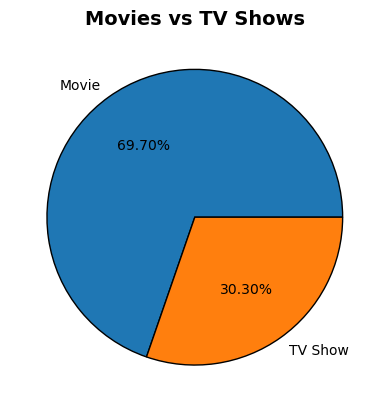

In [24]:
# Pie chart depicting the ratio of values in "type" for overall dataset

typecol=netflix.groupby('type').count()
data=typecol.show_id
plt.pie(data, labels = typecol.index, radius=1, autopct='%2.2f%%', textprops={"fontsize":10}, wedgeprops={"edgecolor":"black"})
plt.title('Movies vs TV Shows', fontdict = {'size' : '14', 'fontweight' : 'bold'})
plt.show()


## 2. Year-wise Release Comparision:

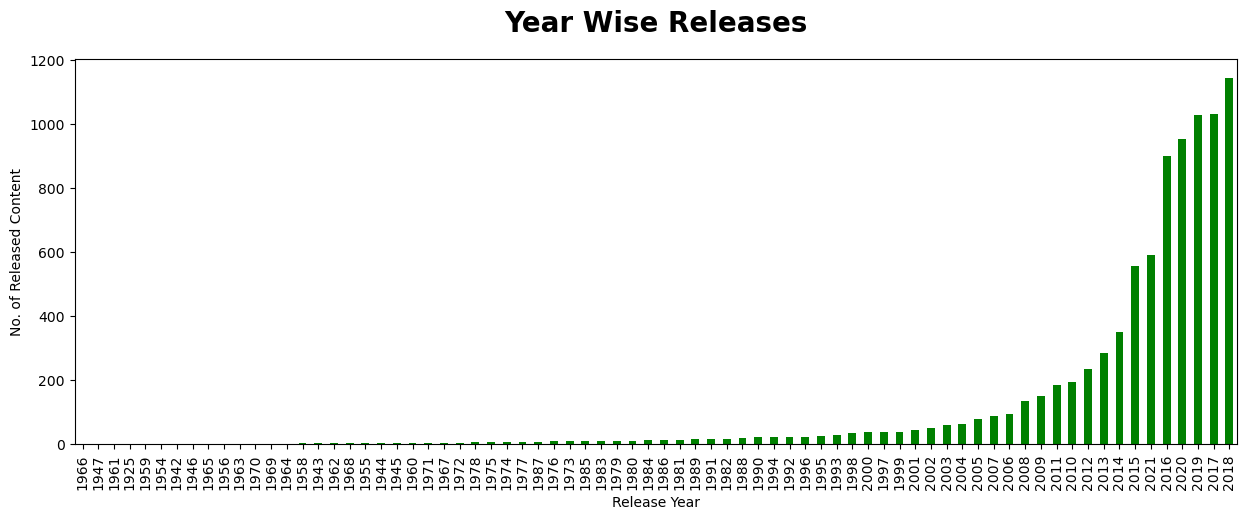

<Figure size 1300x1000 with 0 Axes>

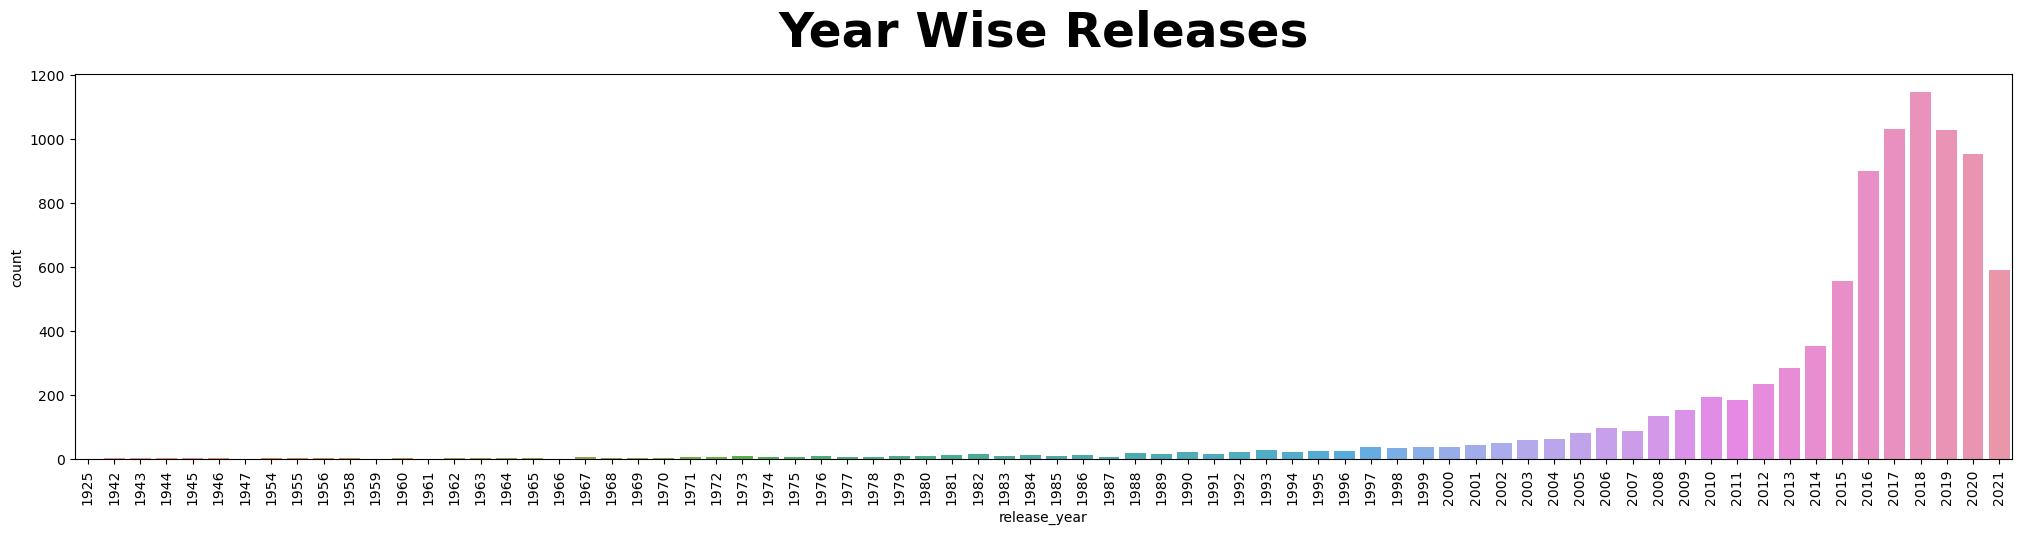

In [25]:
ry=netflix['release_year'].value_counts()
ry.plot(kind='bar', figsize=(15, 5), color='green')
plt.xlabel("Release Year")
plt.ylabel("No. of Released Content")
plt.title("Year Wise Releases",fontsize=20, fontweight='bold',pad=20)
plt.gca().invert_xaxis()
plt.figure(figsize=(13,10))
plt.show()

fig, ax = plt.subplots(figsize=(25,5))
plt.xticks(rotation=90)
plt.title("Year Wise Releases", fontsize=35, fontweight='bold', pad=20)
sns.countplot(ax=ax, x=netflix['release_year'])
plt.show()

## 3. Year-wise Comparision of Recent Content Type:

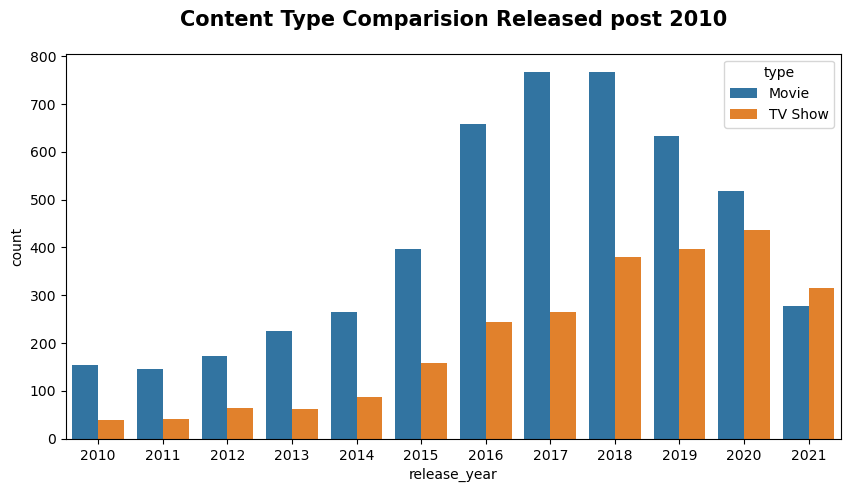

In [26]:
compare=netflix.release_year>=2010
compare=netflix[compare]
fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(rotation=0)
plt.title("Content Type Comparision Released post 2010", fontsize=15, fontweight='bold',pad=20)
sns.countplot(ax=ax, x=compare['release_year'], hue=compare['type'])
plt.show()

## 4. Quantitative Trend in Content Type:

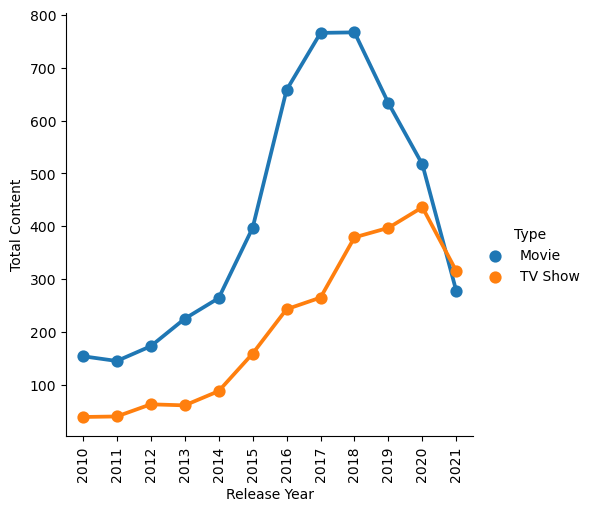

In [27]:
lincom=netflix[['type','release_year']]
lincom=lincom.rename(columns={"release_year": "Release Year"})
lincom=lincom.rename(columns={"type": "Type"})
lincom=lincom.groupby(['Release Year','Type']).value_counts().reset_index(name='Total Content')
lincom=lincom[lincom['Release Year']>=2010]
sns.catplot(data=lincom, x="Release Year", y="Total Content", hue='Type', kind='point', height=5).set_xticklabels(rotation=90)
plt.show()

In [28]:
fig=px.line(lincom, x="Release Year", y="Total Content", color='Type',title='Trend of Content Type post 2010')
fig.show()

## 5. Rating Comparision for Recent Years:

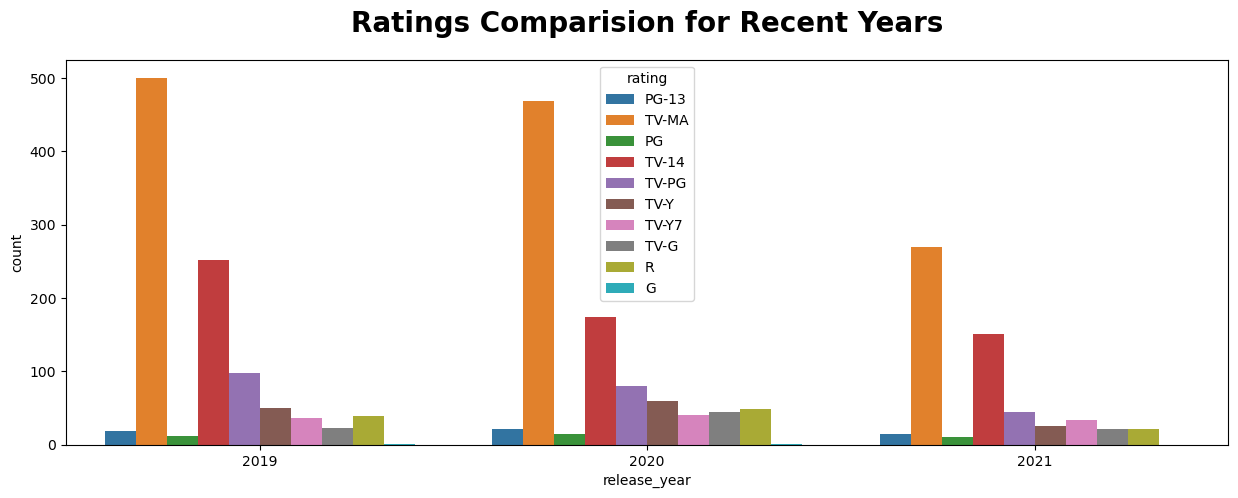

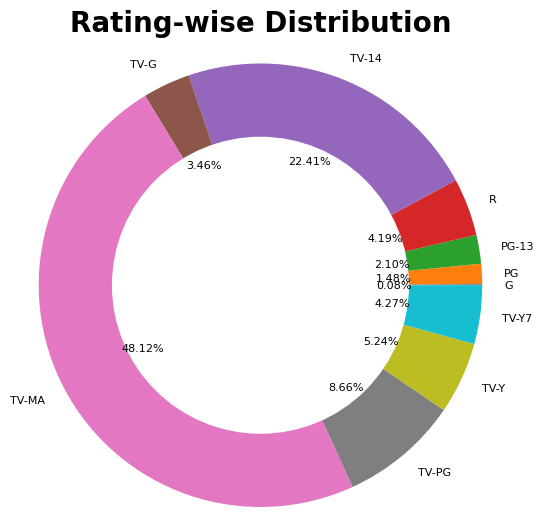

In [29]:
newdata=netflix.release_year>=2019
newdata=netflix[newdata]
fig, ax = plt.subplots(figsize=(15,5))
plt.xticks(rotation=0)
plt.title("Ratings Comparision for Recent Years", fontsize=20, fontweight='bold', pad=20)
sns.countplot(ax=ax, x=newdata['release_year'], hue=newdata['rating'])
plt.show()

typerate=newdata.groupby('rating').count()
data=typerate.show_id
plt.pie(data, labels = typerate.index, radius=1.5, autopct='%2.2f%%', textprops={"fontsize":8})
plt.title('Rating-wise Distribution', fontsize=20, fontweight='bold', pad=50)
my_circle=plt.Circle( (0,0), 1, color='white') 
p=plt.gcf()
p.gca().add_patch(my_circle)
plt.show()

## 6. Country-wise Content Distribution:

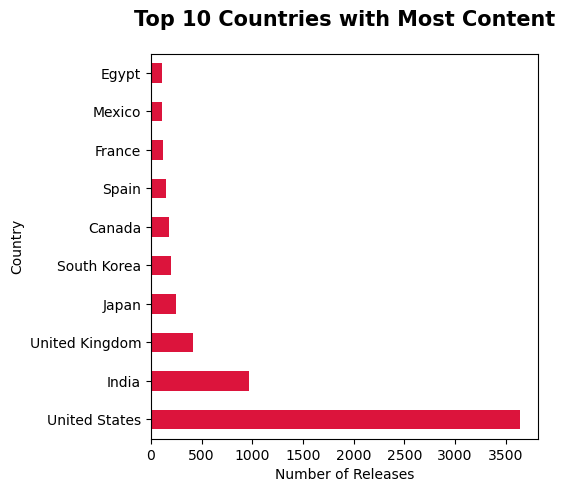

In [30]:
plt.figure(figsize=(5,5))
plt.title("Top 10 Countries with Most Content", fontsize=15, fontweight='bold', pad=20)                                               
netflix["country"].value_counts().head(10).plot(kind="barh",color="crimson")     
plt.xlabel("Number of Releases")
plt.ylabel("Country")
plt.grid(False)
plt.show()

## 7. Duration Frequency for Movies:

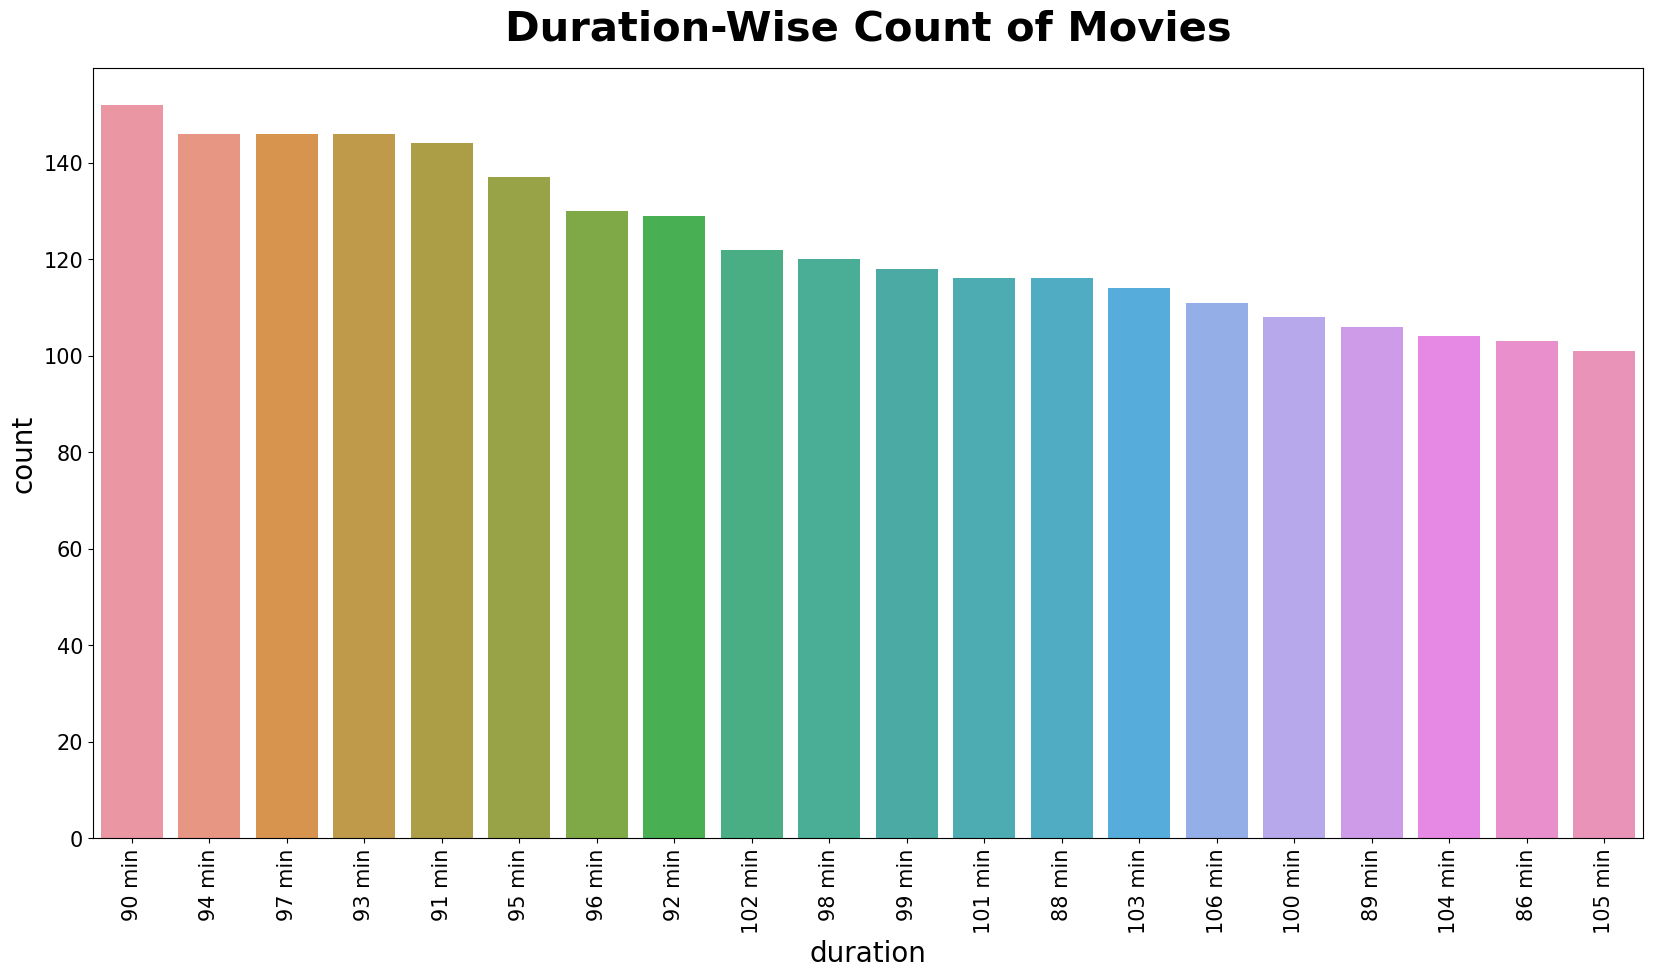

In [31]:
onlymovie=netflix[netflix['type']=="Movie"] 
fig, ax = plt.subplots(figsize=(20,10))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.title("Duration-Wise Count of Movies", fontsize=30, fontweight='bold', pad=20)
plt.xlabel("duration",fontsize=20)
plt.ylabel("count",fontsize=20)
sns.countplot(ax=ax, x='duration',data=onlymovie,order=pd.value_counts(onlymovie['duration']).iloc[:20].index)
plt.show()

## 8. Season Frequency for TV Shows:

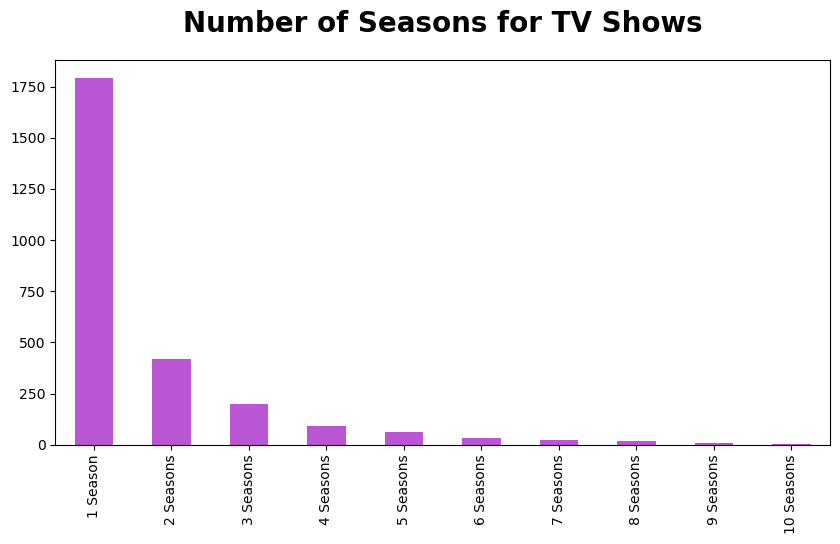

In [32]:
onlytv=netflix[netflix['type']=="TV Show"]
seasoncount=onlytv.duration.value_counts()[:10]
seasoncount.plot(kind='bar',figsize=(10,5), color='mediumorchid')
plt.title("Number of Seasons for TV Shows", fontsize=20, fontweight='bold' ,pad =20)
plt.show()

## 9. Most frequently occuring genre value:

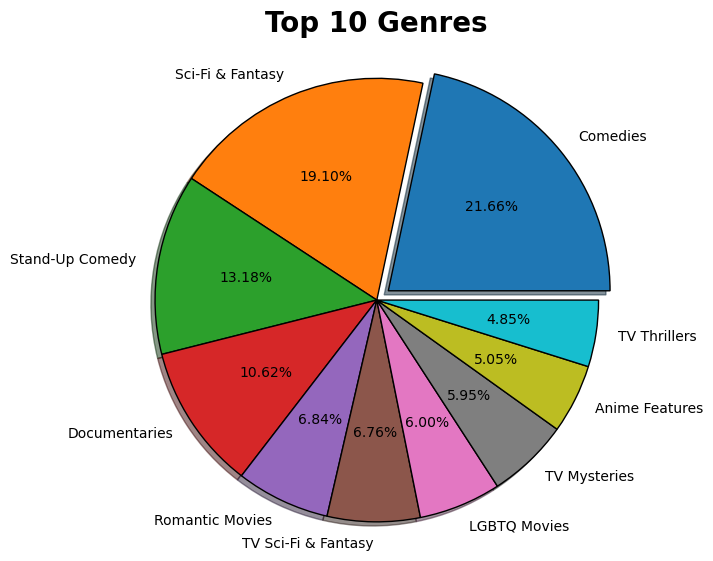

In [33]:
allgenre  =  list((netflix.genre.str.split(",", expand =  True).stack()))
for i  in range(len(allgenre)):
    allgenre[i] = allgenre[i].strip()
    
wordcount=[]
for i in range (len(uniquegenre)):
    ctr=0
    for k in range (len(allgenre)):
        if (uniquegenre[i]==allgenre[k]):
            ctr+=1
    wordcount.append(ctr)

wcsorted=wordcount
wcsorted.sort(reverse=True)

ugsorted=[]

for j in range (len(wcsorted)):
        n=wordcount.index(wcsorted[j])
        ugsorted.append(uniquegenre[n])

                
plt.pie(wcsorted[:10], labels = ugsorted[:10], radius=1.5, autopct='%2.2f%%', shadow=True, textprops={"fontsize":10}, wedgeprops={"edgecolor":"black"},explode=[0.1,0,0,0,0,0,0,0,0,0])
plt.title('Top 10 Genres', fontdict = {'size' : '20', 'fontweight' : 'bold'},pad=60)
plt.show()

## 10. A wordcloud with the most occuring words in the description column:

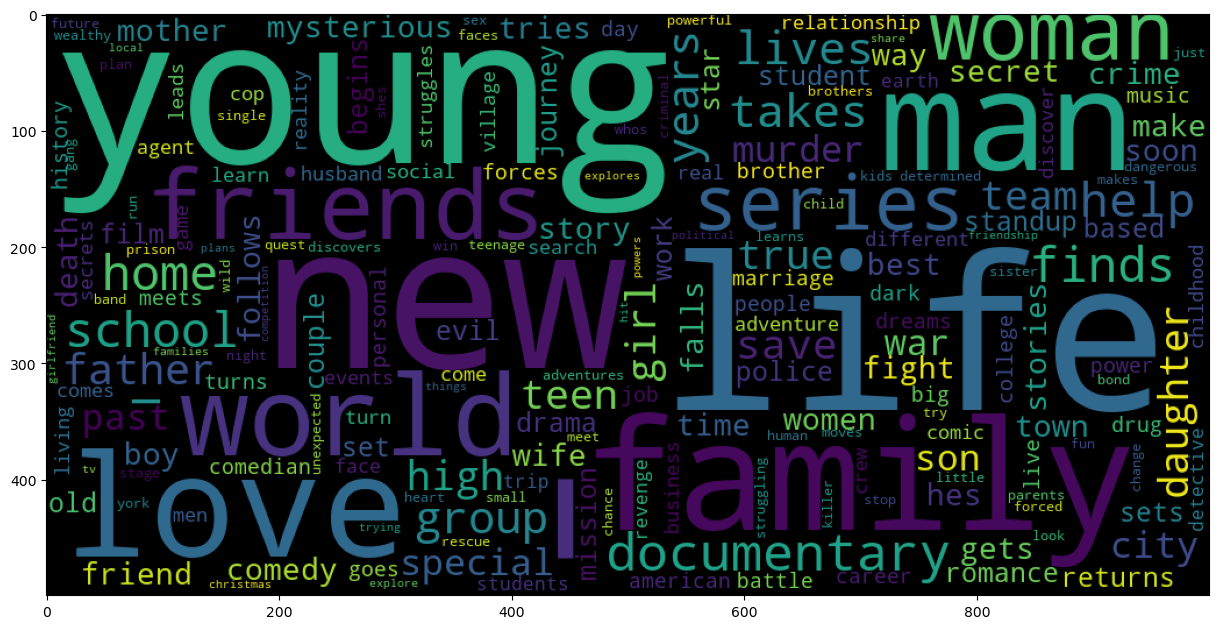

In [34]:
alld = list((netflix.description.str.split(" ", expand =  True).stack()))
for i  in range(len(alld)):
    alld[i] = alld[i].strip()
    alld[i]=alld[i].translate(str.maketrans('','', string.punctuation))
    
alld = map(lambda x:x.lower(), alld)
alld = [word for word in alld if word not in ENGLISH_STOP_WORDS]
word_could_dict=Counter(alld)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)

## Let's apply the Netflix theme colours to our wordcloud !!

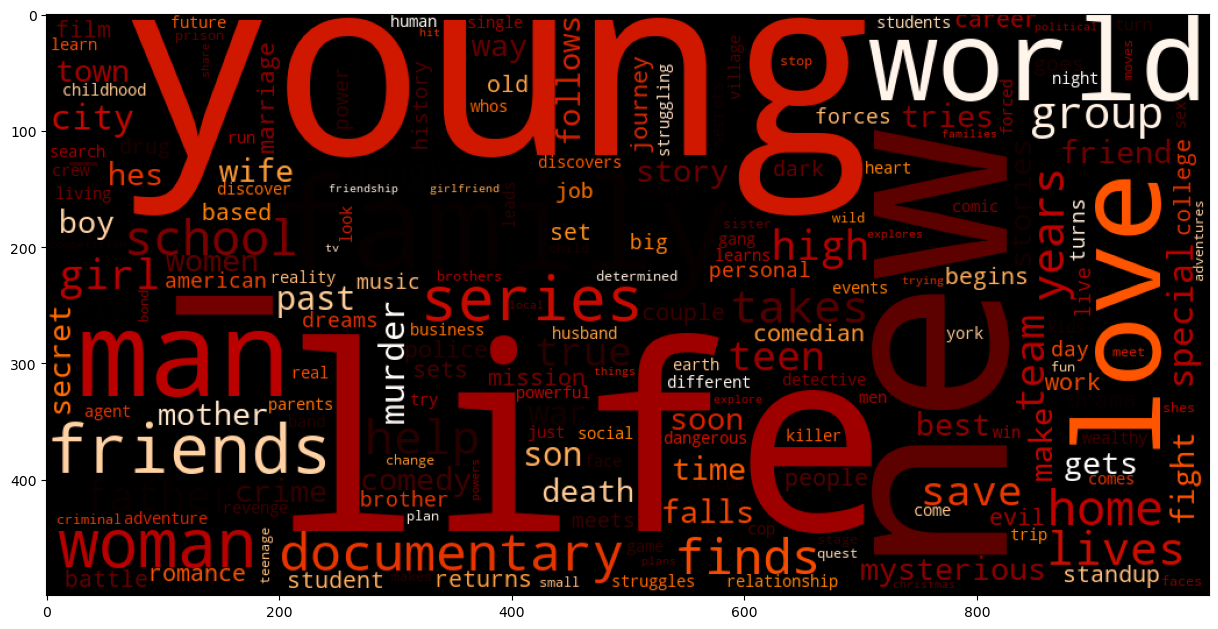

In [35]:
wordcloud = WordCloud(width = 1000, height = 500, colormap='gist_heat').generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)